In [1]:
import pandas as pd

In [2]:
from glob import glob

In [3]:
from tqdm import tqdm_notebook

In [5]:
df_list = list()

for g in tqdm_notebook(glob('./weekly_chart/*.txt')):
    file_name = g.split('\\')[1]
    date_str = file_name.split('__')[0]

    df_chart = pd.read_csv(g, sep='|')
    df_chart = df_chart.drop(columns=['album_img', ])
    df_chart['week'] = date_str
    
    df_list.append(df_chart)

C:\Users\saint\AppData\Local\Temp/ipykernel_28944/870161256.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for g in tqdm_notebook(glob('./weekly_chart/*.txt')):


  0%|          | 0/2049 [00:00<?, ?it/s]

In [6]:
df = pd.concat(df_list, axis=0)
df.head(10)

,rank,song_id,song_title,artist_name,artist_id,album_id,album_title,week
0,1,38541,부메랑,김건모,889,3013,Growing,2000_01_02
1,2,489866,비젼,유승준,1008,3394,You Seung Jun Best & J Duet Collection,2000_01_02
2,3,91324,사랑해 그리고 기억해,god,100007,5288,Chapter 2,2000_01_02
3,4,1139376,상처(傷處),조성모,969,316177,For Your Soul,2000_01_02
4,5,105690,나의 왕자님께 (To My Prince),핑클 (Fin.K.L),100065,5293,Special,2000_01_02
5,6,85257,바꿔,이정현,3895,4556,Let's Go To My Star,2000_01_02
6,7,37992,Good-Bye Day,김장훈,1081,3164,1999 바보,2000_01_02
7,8,91320,실연,코요태,100022,4937,실연,2000_01_02
8,9,422691,고요한 밤 거룩한 밤,조성모,969,29745,Christmas Memories(Remake Special),2000_01_02
9,10,85844,Blue Day,포지션,100177,5328,Biue Day,2000_01_02


In [7]:
df.shape

(102074, 8)

In [8]:
df = df.sort_values(by=['week', 'rank'], ascending=True)
df

,rank,song_id,song_title,artist_name,artist_id,album_id,album_title,week
0,1,38541,부메랑,김건모,889,3013,Growing,2000_01_02
1,2,489866,비젼,유승준,1008,3394,You Seung Jun Best & J Duet Collection,2000_01_02
2,3,91324,사랑해 그리고 기억해,god,100007,5288,Chapter 2,2000_01_02
3,4,1139376,상처(傷處),조성모,969,316177,For Your Soul,2000_01_02
4,5,105690,나의 왕자님께 (To My Prince),핑클 (Fin.K.L),100065,5293,Special,2000_01_02
...,...,...,...,...,...,...,...,...
45,96,33630420,끝사랑,임영웅,994944,10639384,사랑의 콜센타 PART61,2022_01_24
46,97,33077234,Life Goes On,방탄소년단,672375,10521521,BE,2022_01_24
47,98,34564047,Because,ASH ISLAND,2112495,10849216,Because,2022_01_24
48,99,30717645,Snowman,Sia,54103,10107511,Everyday Is Christmas (Snowman Deluxe Edition),2022_01_24


In [9]:
df['score'] = 101 - df['rank']
df

,rank,song_id,song_title,artist_name,artist_id,album_id,album_title,week,score
0,1,38541,부메랑,김건모,889,3013,Growing,2000_01_02,100
1,2,489866,비젼,유승준,1008,3394,You Seung Jun Best & J Duet Collection,2000_01_02,99
2,3,91324,사랑해 그리고 기억해,god,100007,5288,Chapter 2,2000_01_02,98
3,4,1139376,상처(傷處),조성모,969,316177,For Your Soul,2000_01_02,97
4,5,105690,나의 왕자님께 (To My Prince),핑클 (Fin.K.L),100065,5293,Special,2000_01_02,96
...,...,...,...,...,...,...,...,...,...
45,96,33630420,끝사랑,임영웅,994944,10639384,사랑의 콜센타 PART61,2022_01_24,5
46,97,33077234,Life Goes On,방탄소년단,672375,10521521,BE,2022_01_24,4
47,98,34564047,Because,ASH ISLAND,2112495,10849216,Because,2022_01_24,3
48,99,30717645,Snowman,Sia,54103,10107511,Everyday Is Christmas (Snowman Deluxe Edition),2022_01_24,2


# 이상한 데이터가 있을지 모른다!

In [10]:
df_id_and_name = df[['artist_id', 'artist_name']].drop_duplicates().groupby('artist_id').count()
df_id_and_name

,artist_name
artist_id,
-1,1
15,1
17,1
19,1
22,1
...,...
995171,1
995172,1
995173,1


In [11]:
df_multiple_names = df_id_and_name.loc[df_id_and_name['artist_name'] > 1]
df_multiple_names = df_multiple_names.reset_index()
display(df_multiple_names)
df_multiple_names = df_multiple_names.set_index('artist_id')
df_multiple_names

,artist_id,artist_name
0,525,2
1,35155,2
2,100177,2
3,253866,2
4,255466,2
5,2939206,2
6,495401,2
7,52607,2
8,52905,2
9,686811,2


,artist_name
artist_id,
525,2
35155,2
100177,2
253866,2
255466,2
2939206,2
495401,2
52607,2
52905,2


In [12]:
df_id_and_names = df[['artist_id', 'artist_name']].drop_duplicates()
df_id_and_names

,artist_id,artist_name
0,889,김건모
1,1008,유승준
2,100007,god
3,969,조성모
4,100065,핑클 (Fin.K.L)
...,...,...
48,723192,이승윤
47,2853095,GAYLE
39,2893700,탑현
18,2399724,YENA (최예나)


In [13]:
print(df_multiple_names.index)

Index([      525,     35155,  '100177',  '253866',  '255466', '2939206',
        '495401',   '52607',   '52905',  '686811',  '716279',    '7567',
          '8314',  '873756',  '925515'],
      dtype='object', name='artist_id')


In [14]:
df_id_and_names.loc[df_id_and_names['artist_id'].isin(df_multiple_names.index)]

,artist_id,artist_name
11,100177,포지션
26,525,조규찬
14,525,Cho Kyu Chan
29,35155,아이
47,35155,김용진
26,8314,한경일
15,7567,데프콘
31,255466,와우
19,253866,2AM
20,52905,지


In [15]:
df

,rank,song_id,song_title,artist_name,artist_id,album_id,album_title,week,score
0,1,38541,부메랑,김건모,889,3013,Growing,2000_01_02,100
1,2,489866,비젼,유승준,1008,3394,You Seung Jun Best & J Duet Collection,2000_01_02,99
2,3,91324,사랑해 그리고 기억해,god,100007,5288,Chapter 2,2000_01_02,98
3,4,1139376,상처(傷處),조성모,969,316177,For Your Soul,2000_01_02,97
4,5,105690,나의 왕자님께 (To My Prince),핑클 (Fin.K.L),100065,5293,Special,2000_01_02,96
...,...,...,...,...,...,...,...,...,...
45,96,33630420,끝사랑,임영웅,994944,10639384,사랑의 콜센타 PART61,2022_01_24,5
46,97,33077234,Life Goes On,방탄소년단,672375,10521521,BE,2022_01_24,4
47,98,34564047,Because,ASH ISLAND,2112495,10849216,Because,2022_01_24,3
48,99,30717645,Snowman,Sia,54103,10107511,Everyday Is Christmas (Snowman Deluxe Edition),2022_01_24,2


In [19]:
df_score = df[['artist_id', 'score']].groupby('artist_id').sum().sort_values(by='score', ascending=False)
df_score

,score
artist_id,
261143,111959
672375,90977
198094,61199
236815,46419
792022,38828
...,...
456681,1
3519~231575,1
714975,1


In [17]:
df_id_and_names

,artist_id,artist_name
0,889,김건모
1,1008,유승준
2,100007,god
3,969,조성모
4,100065,핑클 (Fin.K.L)
...,...,...
48,723192,이승윤
47,2853095,GAYLE
39,2893700,탑현
18,2399724,YENA (최예나)


In [21]:
df_score = df_score.reset_index()
df_score

,artist_id,score
0,261143,111959
1,672375,90977
2,198094,61199
3,236815,46419
4,792022,38828
...,...,...
3425,456681,1
3426,3519~231575,1
3427,714975,1
3428,443420~677911,1


In [25]:
df_total = df_score.merge(df_id_and_names, on='artist_id')
display(df_total)

,artist_id,score,artist_name
0,261143,111959,아이유
1,672375,90977,방탄소년단
2,198094,61199,BIGBANG
3,236815,46419,다비치
4,792022,38828,볼빨간사춘기
...,...,...,...
3441,456681,1,BGM
3442,3519~231575,1,MC 한새~박소연 (bora)
3443,714975,1,스무살
3444,443420~677911,1,박재범~Ugly Duck


# 그래프를 그려보자. 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from c

C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saint\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49548 missing from current fon

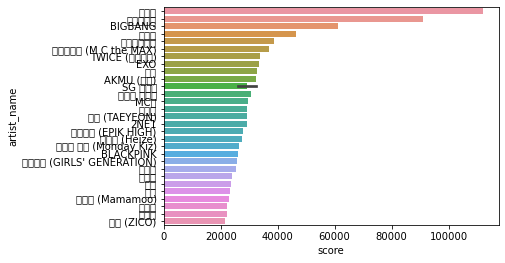

In [29]:
sns.barplot(data=df_total.head(30), x='score', y='artist_name')
plt.show()

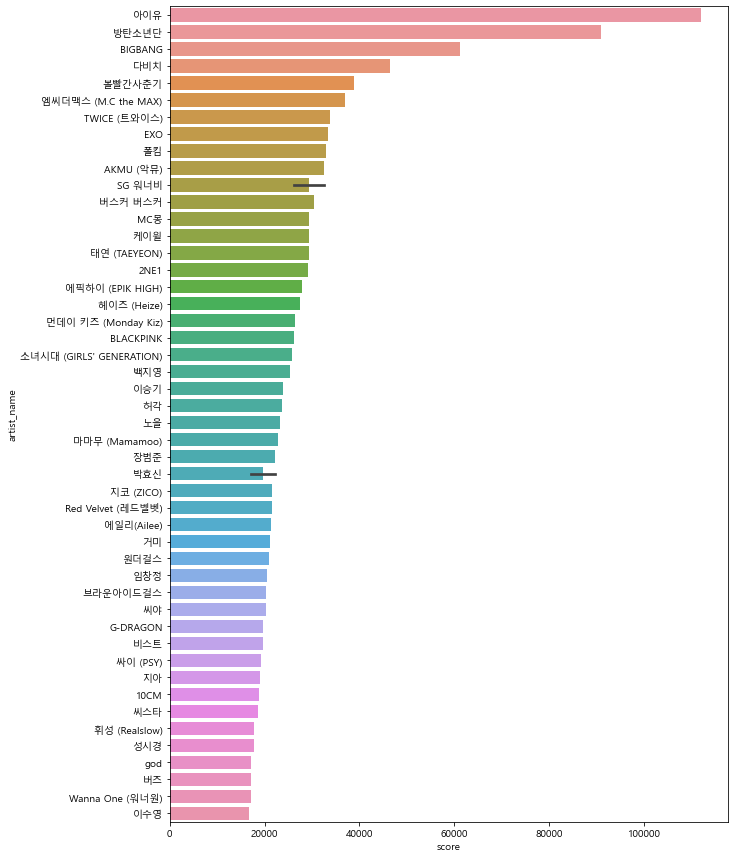

In [33]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
# 맥 사용자: plt.rcParams['font.family'] = 'AppleGothic'
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(data=df_total.head(50), x='score', y='artist_name')
plt.show()